<a href="https://colab.research.google.com/github/Muhammadridho100902/google_collab/blob/main/Loan_Prediction_Based_on_Customer_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [2]:
! chmod 600 /content/kaggle.json
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d subhamjain/loan-prediction-based-on-customer-behavior

loan-prediction-based-on-customer-behavior.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_file = zipfile.ZipFile('/content/loan-prediction-based-on-customer-behavior.zip', 'r')
zip_file.extractall('/content/')

In [4]:
df = pd.read_csv('/content/Training Data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
df.drop(['Id', 'CITY'], axis=1 ,inplace=True)
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tamil_Nadu,3,14,1


In [6]:
df.select_dtypes(include='object').nunique()

Married/Single      2
House_Ownership     3
Car_Ownership       2
Profession         51
STATE              29
dtype: int64

# Create Feature Function Segmentation into Smaller Unique Value

In [7]:
df.Profession.unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [8]:
def segment_profession(profession):
    if profession in ['Mechanical_engineer', 'Design_Engineer', 'Chemical_engineer', 'Biomedical_Engineer',
                      'Computer_hardware_engineer', 'Petroleum_Engineer', 'Civil_engineer',
                      'Industrial_Engineer', 'Technology_specialist']:
        return 'Engineering'
    elif profession in ['Software_Developer', 'Technical_writer', 'Graphic_Designer', 'Web_designer']:
        return 'IT/Software'
    elif profession in ['Civil_servant', 'Politician', 'Police_officer', 'Magistrate', 'Official', 'Army_officer']:
        return 'Government'
    elif profession in ['Librarian', 'Teacher']:
        return 'Education'
    elif profession in ['Economist', 'Financial_Analyst']:
        return 'Finance'
    elif profession in ['Flight_attendant', 'Air_traffic_controller', 'Aviator']:
        return 'Aviation'
    elif profession in ['Architect', 'Designer', 'Fashion_Designer']:
        return 'Design'
    elif profession in ['Physician', 'Dentist', 'Surgeon']:
        return 'Medical'
    elif profession in ['Hotel_Manager', 'Chef']:
        return 'Hospitality'
    elif profession == 'Artist':
        return 'Art'
    elif profession in ['Comedian', 'Psychologist']:
        return 'Entertainment'
    elif profession in ['Secretary', 'Computer_operator']:
        return 'Administration'
    elif profession in ['Chartered_Accountant', 'Analyst']:
        return 'Finance/Accounting'
    elif profession in ['Technician', 'Microbiologist', 'Scientist', 'Geologist', 'Statistician']:
        return 'Science/Research'
    else:
        return 'Other'

# Apply the segmentation function to the array of unique values
df['Profession'] = df['Profession'].apply(segment_profession)

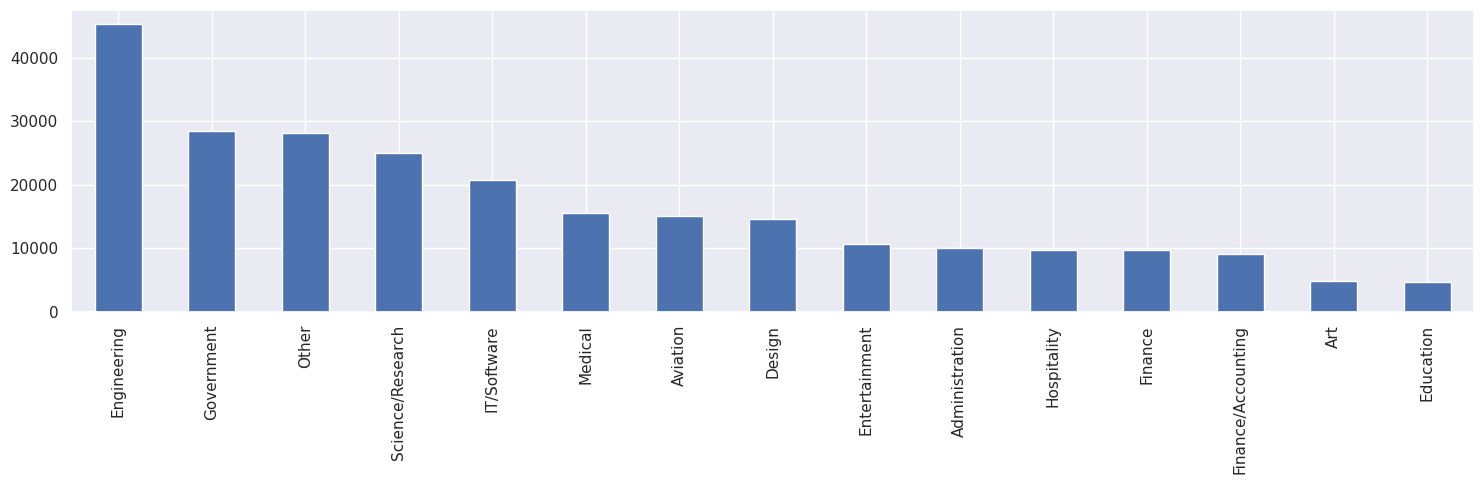

In [9]:
plt.figure(figsize=(15,5))
df['Profession'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

In [10]:
def segment_state(state):
    if state in ['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu']:
        return 'South/Central India'
    elif state in ['Gujarat', 'Rajasthan']:
        return 'West India'
    elif state in ['Telangana', 'Andhra_Pradesh']:
        return 'Telugu States'
    elif state in ['Bihar', 'West_Bengal', 'Haryana', 'Puducherry', 'Uttar_Pradesh']:
        return 'North India'
    elif state in ['Himachal_Pradesh', 'Punjab', 'Uttarakhand']:
        return 'Northwest India'
    elif state in ['Tripura', 'Jharkhand', 'Mizoram', 'Assam', 'Jammu_and_Kashmir']:
        return 'Northeast India'
    elif state in ['Delhi', 'Chhattisgarh', 'Chandigarh']:
        return 'Central India'
    elif state in ['Uttar_Pradesh[5]', 'Manipur', 'Sikkim']:
        return 'Other'
    else:
        return 'Unknown'

# Apply the segmentation function to the array of unique values
df['STATE'] = df['STATE'].apply(segment_state)

<Axes: >

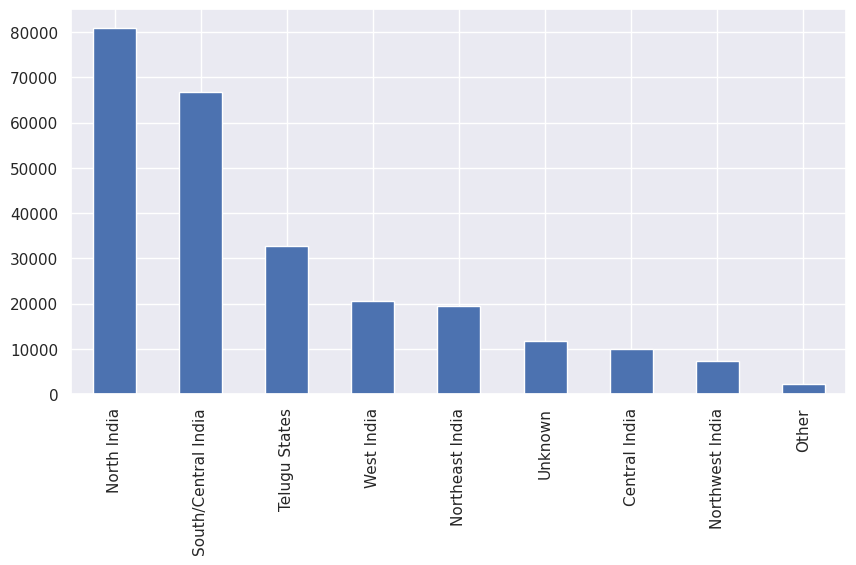

In [11]:
plt.figure(figsize=(10,5))
df['STATE'].value_counts().plot(kind='bar')

# EDA

In [12]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

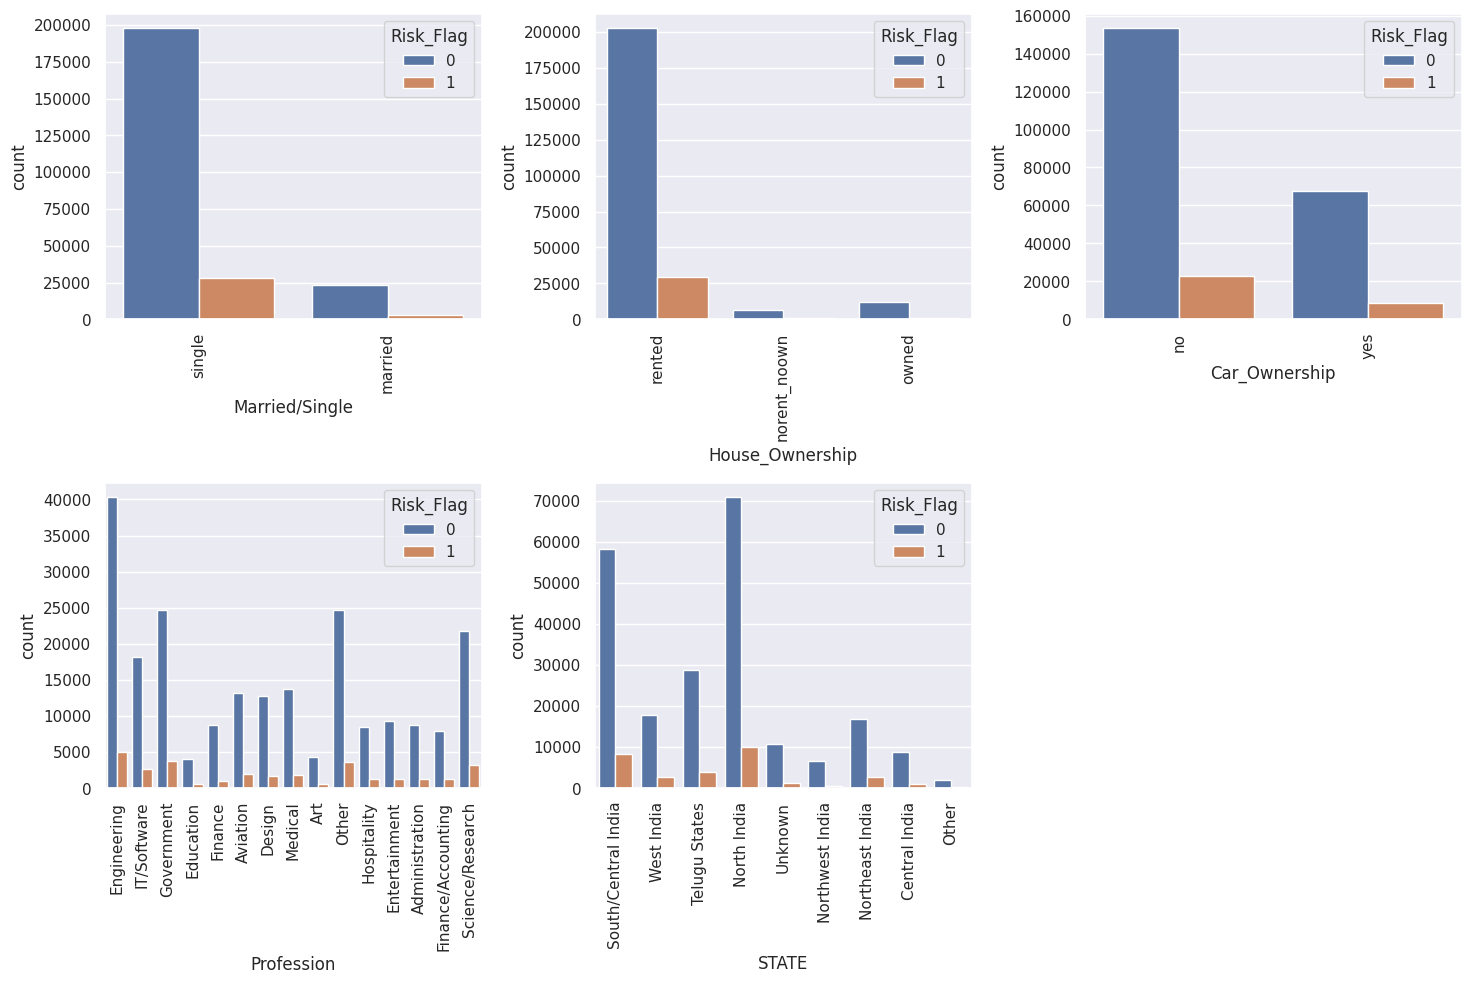

In [13]:
cat_vars = ['Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'STATE']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate(cat_vars):
  sns.countplot(x=var, hue='Risk_Flag', data=df, ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

fig.tight_layout()
fig.delaxes(axs[5])
plt.show()



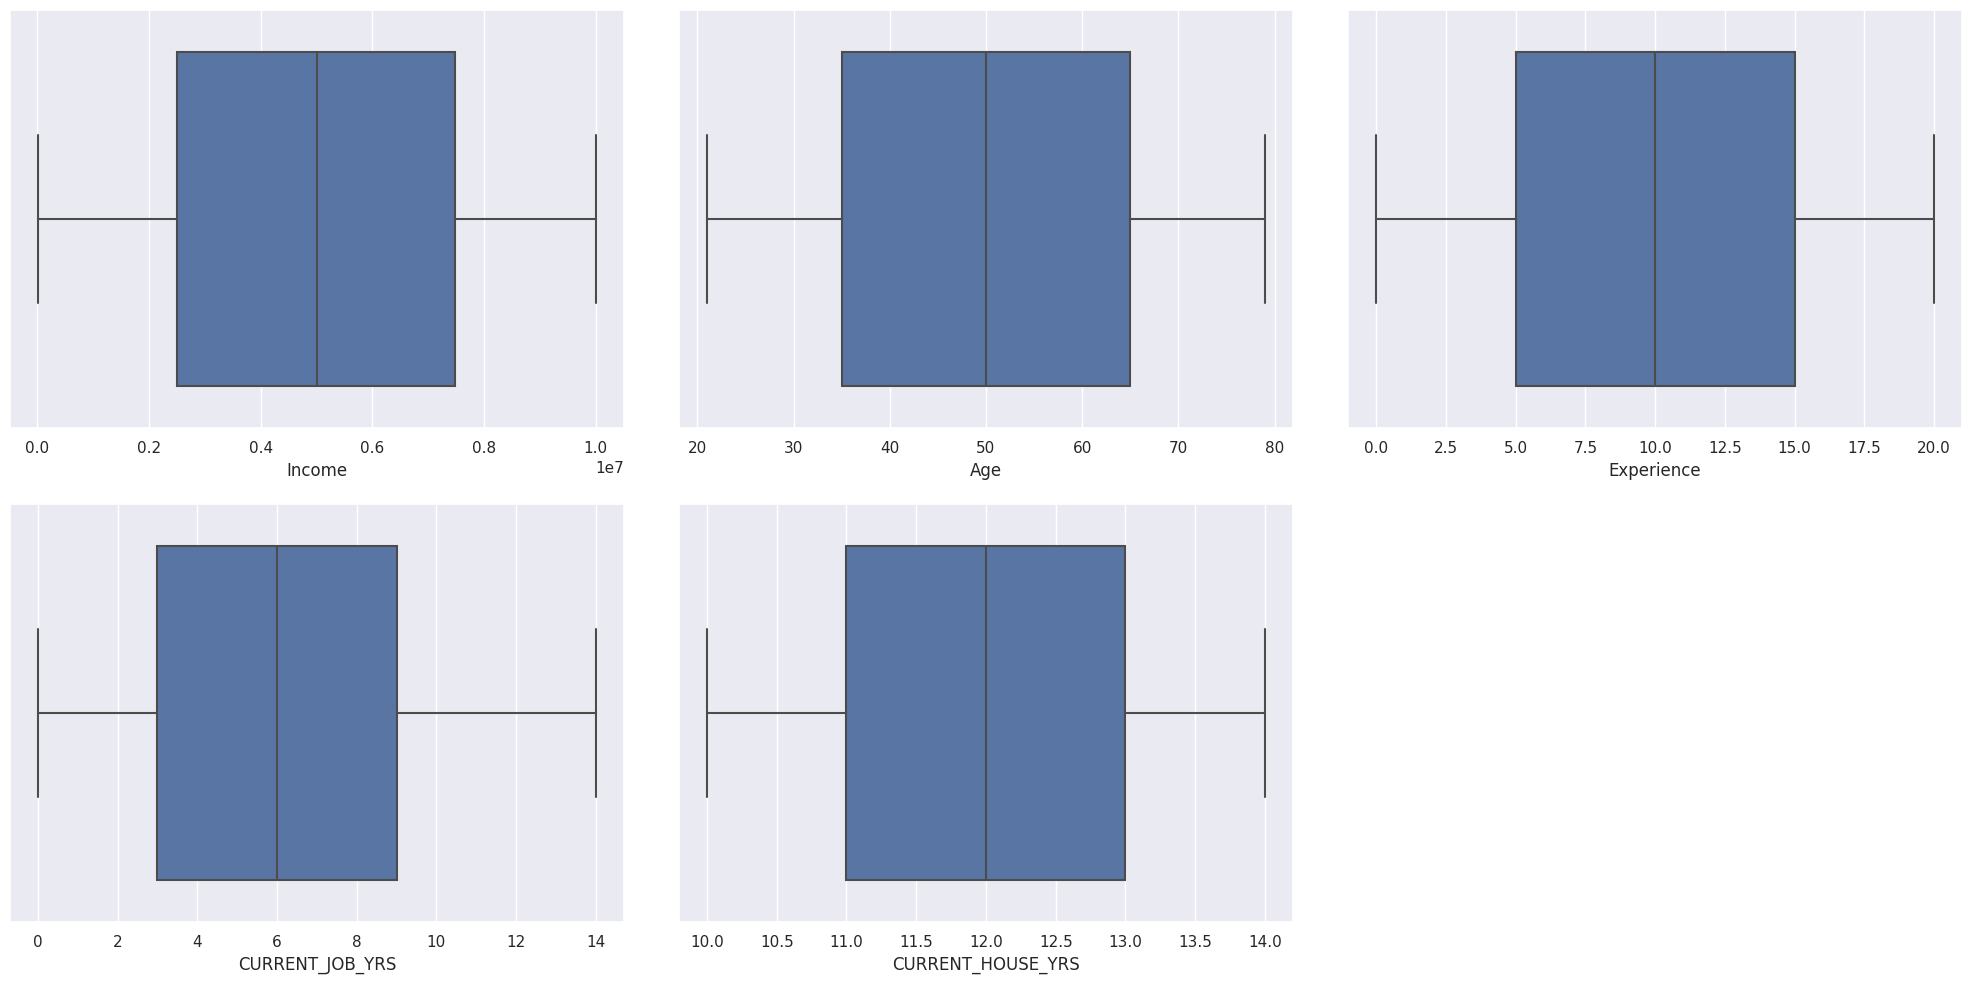

In [14]:
num_vars = ['Income', 'Age', 'Experience',
            'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
  sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()
fig.delaxes(axs[5])
plt.show()

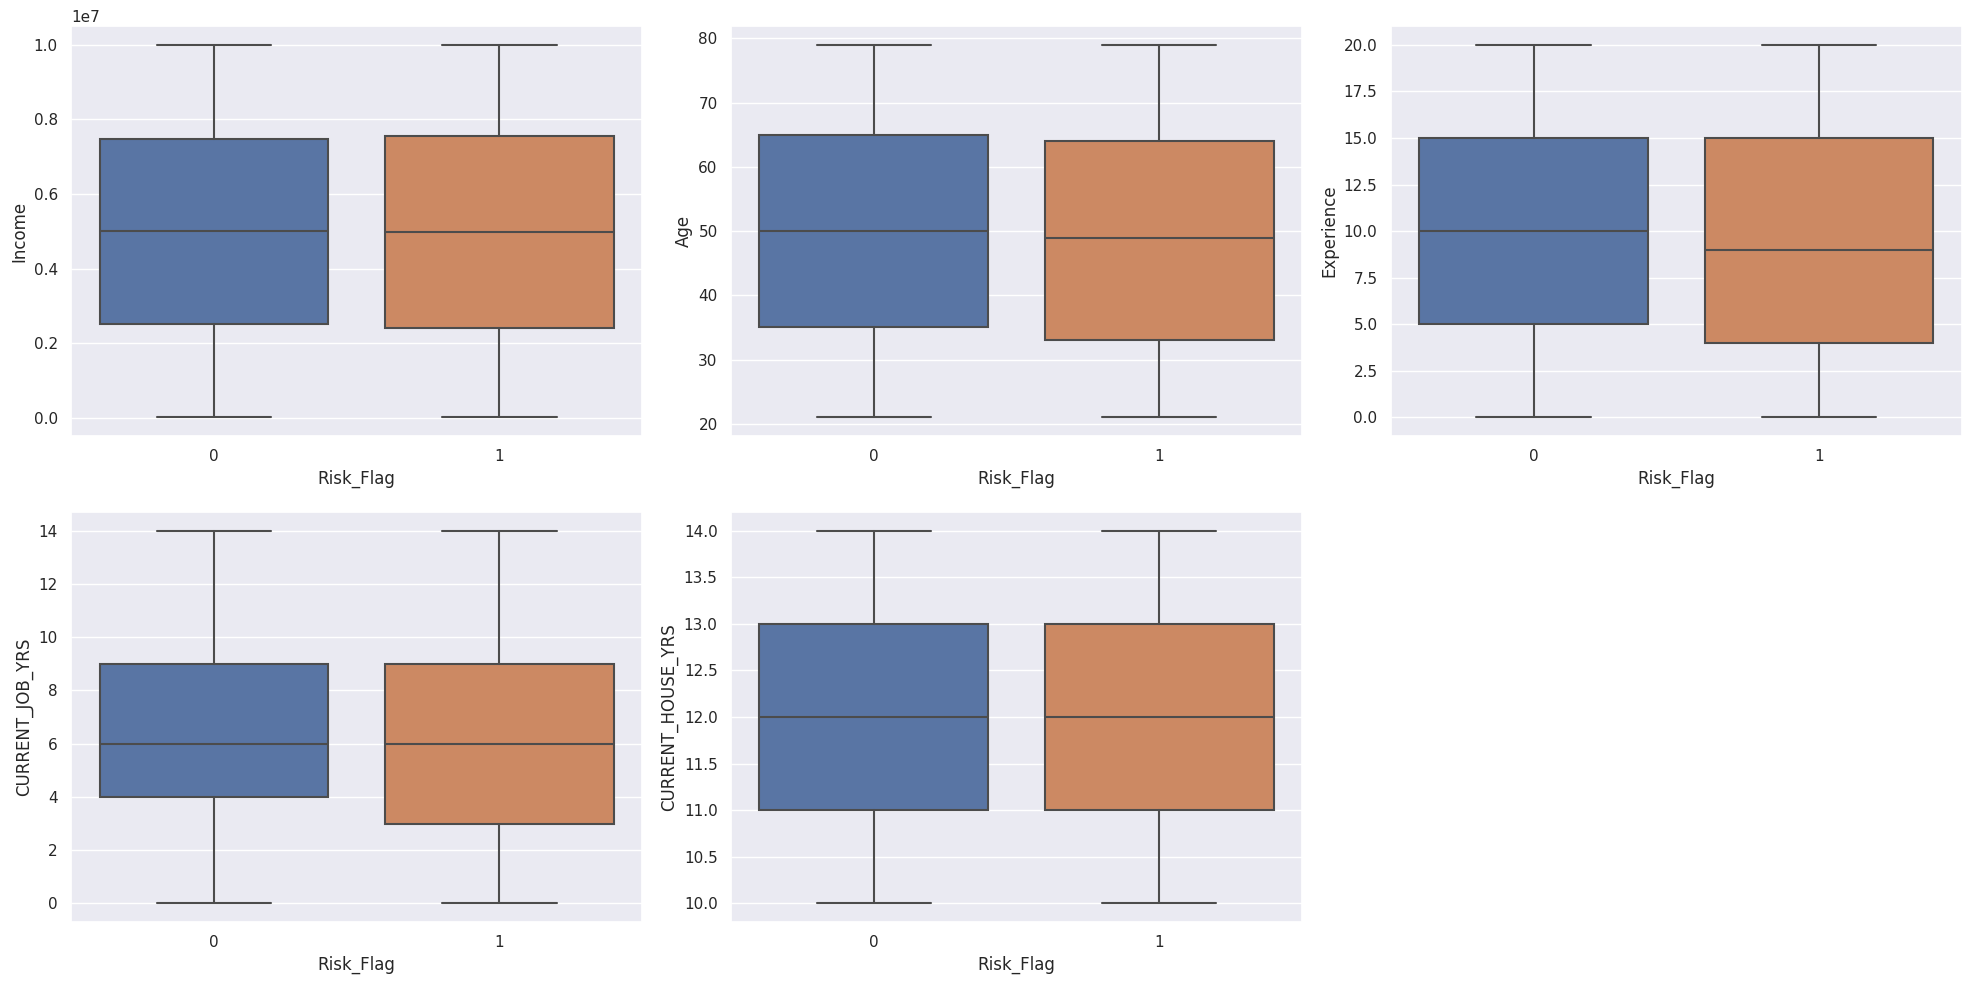

In [15]:
num_vars = ['Income', 'Age', 'Experience',
            'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
  sns.boxplot(y=var, x='Risk_Flag' ,data=df, ax=axs[i])

fig.tight_layout()
fig.delaxes(axs[5])
plt.show()

In [16]:
df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

# Label Encoding

In [17]:
from sklearn import preprocessing

for col in df.select_dtypes(include=['object']).columns:
  # Initialize a LabelEncoder object
  label_encoder = preprocessing.LabelEncoder()

  # Fit the encoder to the unique values in the column
  label_encoder.fit(df[col].unique())

  # Transform the column using the encoder
  df[col] = label_encoder.transform(df[col])

  # Print the column name and the unique encoded values
  print(f'{col}: {df[col].unique()}')

Married/Single: [1 0]
House_Ownership: [2 0 1]
Car_Ownership: [0 1]
Profession: [ 5 11  9  4  7  2  3 12  1 13 10  6  0  8 14]
STATE: [5 8 6 1 7 3 2 0 4]


# Correlation Heatmap

<Axes: >

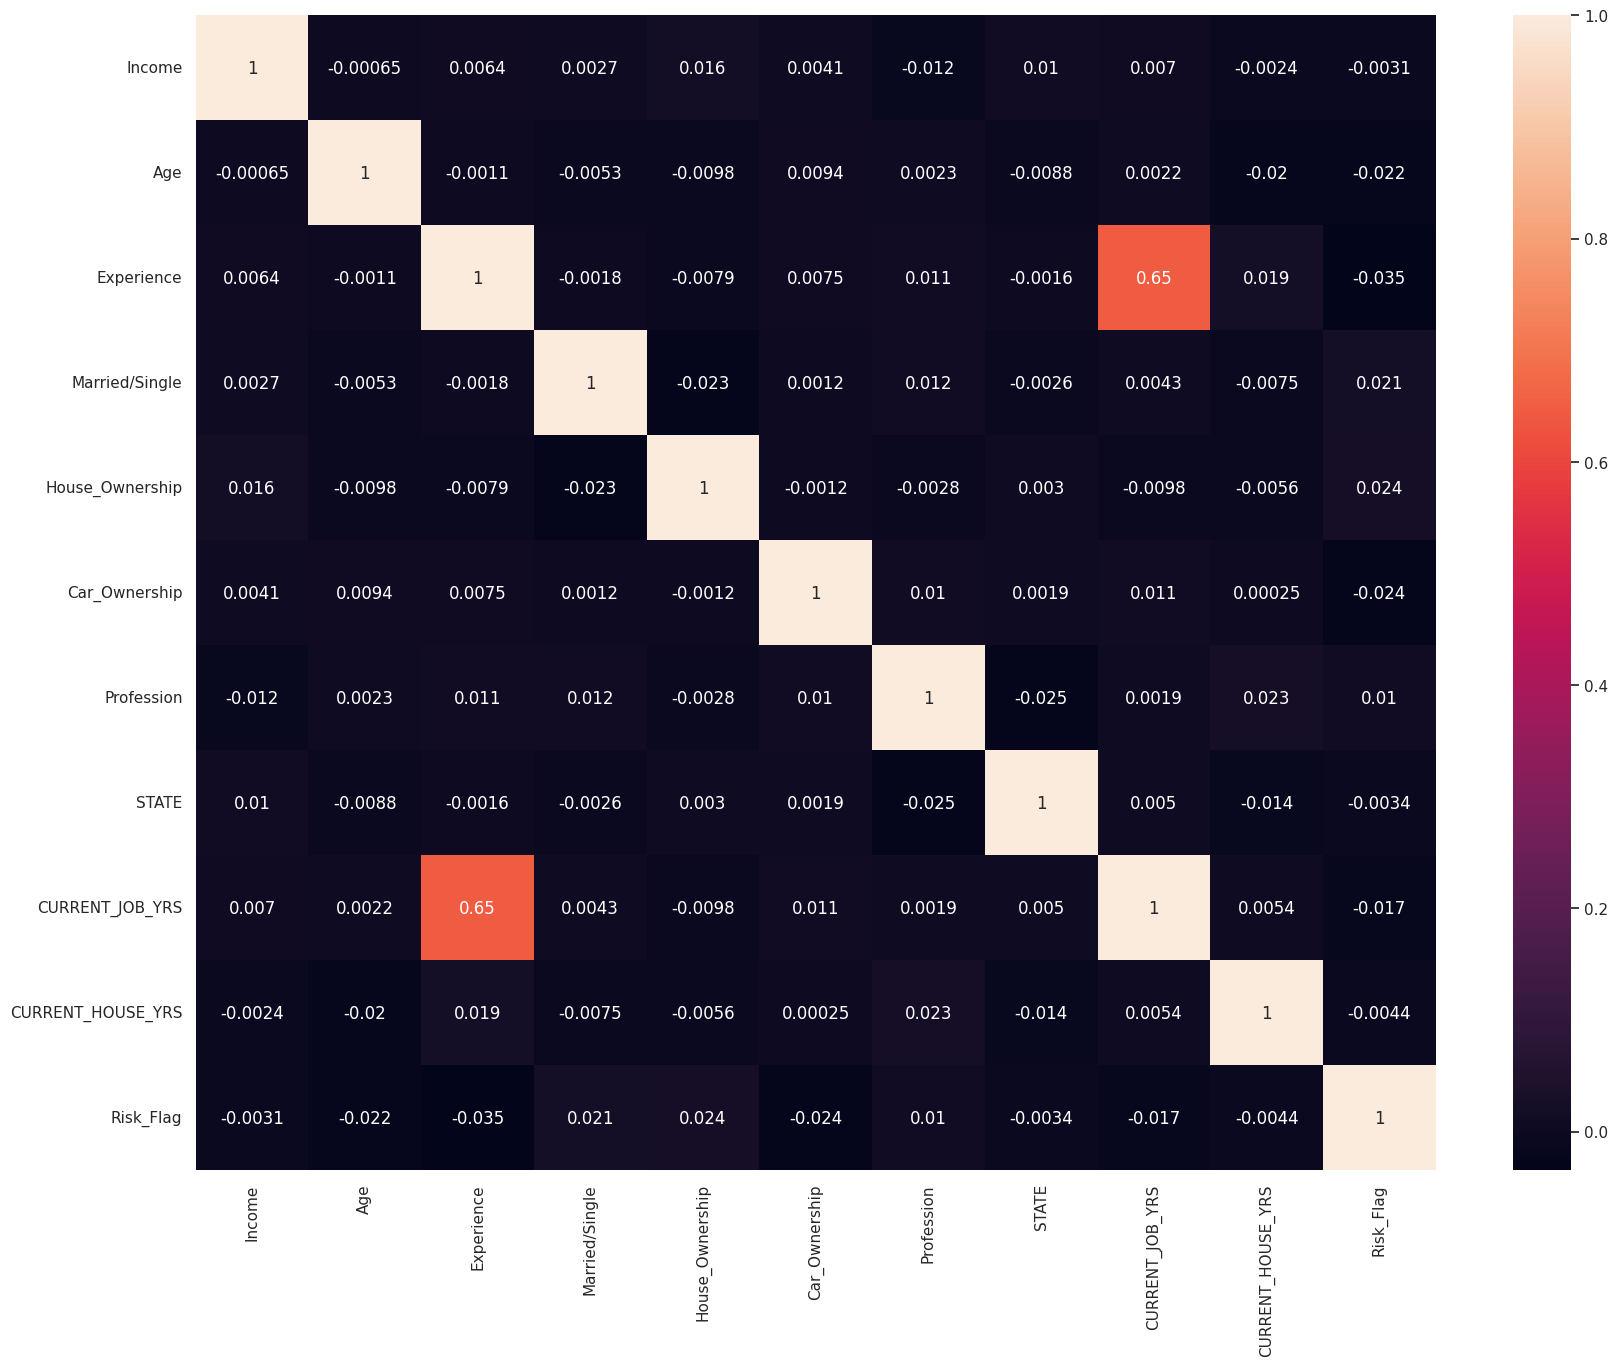

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

x = df.drop('Risk_Flag', axis=1)
y = df['Risk_Flag']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,
                                                 random_state=0)

# Decision Tree

In [20]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2', None],
#     'class_weight': [None, 'balanced']
# }

# dtree = DecisionTreeClassifier()
# grd = GridSearchCV(dtree, param_grid, cv=5)
# grd.fit(x_train, y_train)

# print(grd.best_params_)
# print(grd.best_score_)

In [21]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(class_weight=None, criterion='gini',
                               max_depth=None, max_features='sqrt',
                               min_samples_leaf=1, min_samples_split=10,
                               splitter='random').fit(x_train,y_train)

In [22]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(x_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 89.15 %


In [23]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.891547619047619
Precision Score :  0.891547619047619
Recall Score :  0.891547619047619
Jaccard Score :  0.8043174739555364
Log Loss :  3.90902002827211


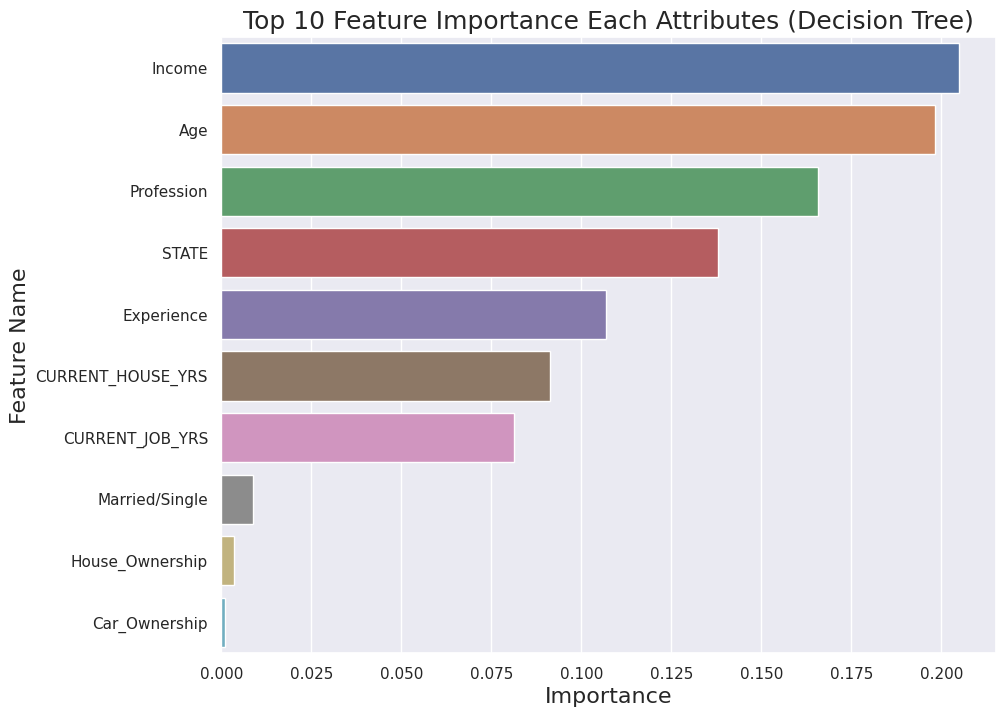

In [24]:
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.891547619047619')

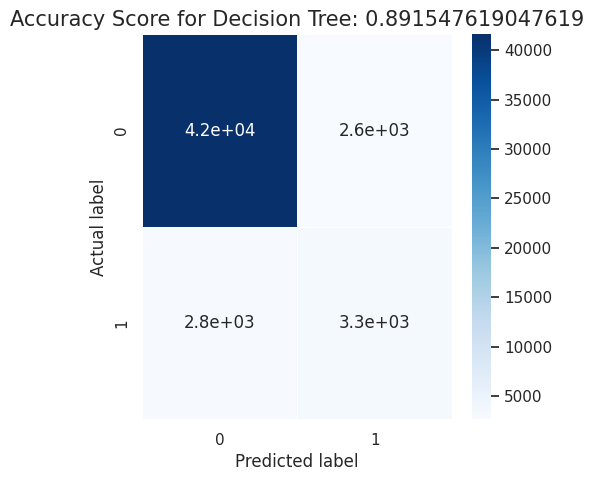

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

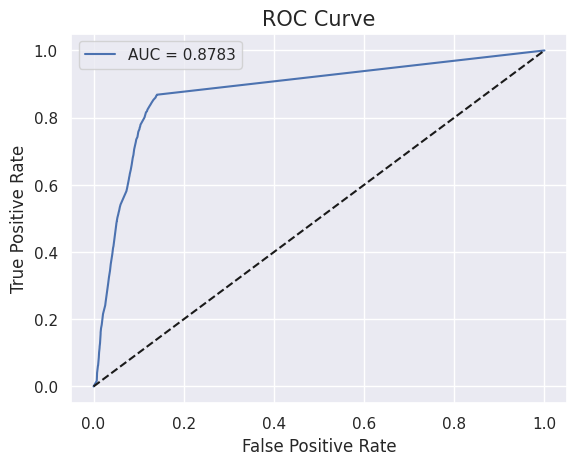

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [27]:
import pickle

In [28]:
filename = 'DecisionTree.sav'
pickle.dump(dtree, open(filename, 'wb'))

In [29]:
loaded_model = pickle.load(open('DecisionTree.sav', 'rb'))

In [30]:
df_test = pd.read_csv('/content/Test Data.csv')
df_test.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [31]:
from sklearn import preprocessing

for col in df_test.select_dtypes(include=['object']).columns:
  # Initialize a LabelEncoder object
  label_encoder = preprocessing.LabelEncoder()

  # Fit the encoder to the unique values in the column
  label_encoder.fit(df_test[col].unique())

  # Transform the column using the encoder
  df_test[col] = label_encoder.transform(df_test[col])

  # Print the column name and the unique encoded values
  print(f'{col}: {df_test[col].unique()}')

Married/Single: [1 0]
House_Ownership: [2 1 0]
Car_Ownership: [0 1]
Profession: [26 24 30  1 12 20  4 25 42 21 48 37 39 40 41 36  7 50 23 43 35 44 19  2
 34 27 18  3 11  9 15  0 10 29  8 28 46 32 33 14 47 49 31 45  6 17  5 13
 22 16 38]
CITY: [181 131 290 171  39 246 222 316  19 208  58 269  47  46 299  63 115  64
 232 170 143 286  57 119 135 279 302 270 285 153  91  72 112  10 235 281
 132  95  73  40 291  27  81 203  21 106 314 194 298 150 239 116 102 204
 252 152 251 272  66 183 268 111 151  94  92 156 129 157 133  25 233  88
 191  26  70 297  97 267  90  44  29 308 211 221 162   7  67 312 186   5
 255 137 293 265 168 259 195 258  11  68  52 274 288  56 144  16 176 136
 315  17 263 220 238  51   0 243 142 309 188 257 187 178 101 225 301 175
 118 169 276  18  77 121 313  79  15 128  24 305  35 273  78 303 126   1
  76 141 107 165 164 249 110  61 214 163 149 271 215 311 236  89 294 158
 201 205 160  41   8 155 123 154 242 199 113 159  22 254 139 289  36 190
 213 256 103 277 216 264   

In [32]:
test_data = df_test.drop(['CITY', 'ID'], axis=1)

In [33]:
test_data

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,1,2,0,26,28,4,13
1,1215004,25,5,1,2,0,24,14,5,10
2,8901342,50,12,1,2,0,30,14,9,14
3,1944421,49,9,0,2,1,1,14,3,12
4,13429,25,18,1,2,1,12,28,13,11
...,...,...,...,...,...,...,...,...,...,...
27995,9955481,57,13,1,2,0,44,0,5,10
27996,2917765,47,9,1,2,0,47,13,9,14
27997,8082415,24,5,1,2,0,30,14,4,13
27998,9474180,51,13,1,2,1,7,4,13,14


In [35]:
df_test.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,1,2,0,26,181,28,4,13
1,2,1215004,25,5,1,2,0,24,131,14,5,10
2,3,8901342,50,12,1,2,0,30,290,14,9,14
3,4,1944421,49,9,0,2,1,1,171,14,3,12
4,5,13429,25,18,1,2,1,12,39,28,13,11


In [36]:
prediction = loaded_model.predict(test_data)

submission = pd.DataFrame({
    'ID' : df_test['ID'],
    'Risk_Flag' : prediction
    })

submission.head()

,ID,Risk_Flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [37]:
submission.to_csv('Submit.csv', index=False)

In [39]:
data_submit = pd.read_csv('Submit.csv')

In [42]:
sample_prediciton = pd.read_csv('/content/Sample Prediction Dataset.csv')
sample_prediciton.head()

,id,risk_flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [40]:
data_submit['Risk_Flag'].value_counts()

0    25055
1     2945
Name: Risk_Flag, dtype: int64

In [43]:
sample_prediciton['risk_flag'].value_counts()

0    24407
1     3593
Name: risk_flag, dtype: int64

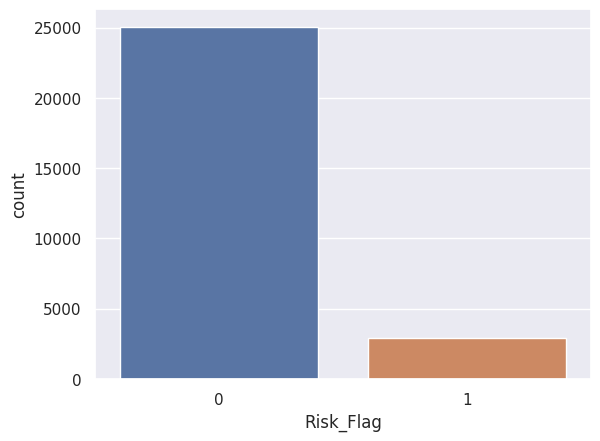

In [46]:
sns.countplot(data=data_submit, x='Risk_Flag')
plt.show()

<Axes: xlabel='risk_flag', ylabel='count'>

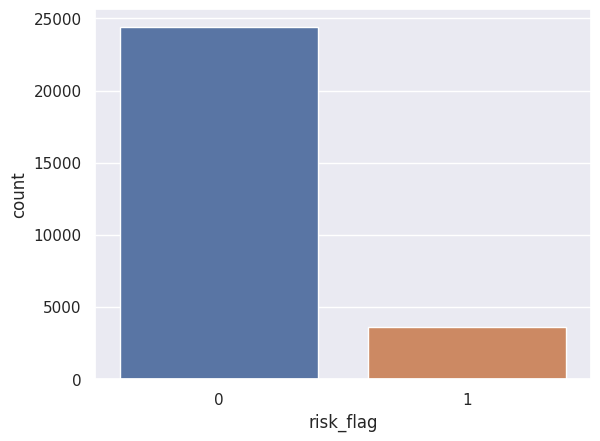

In [48]:
sns.countplot(data=sample_prediciton, x='risk_flag')